<a href="https://colab.research.google.com/github/talktovishal/NLP-ML-Projects/blob/master/Project1_WordCount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.       Download and parse Reuters dataset (done) -- https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection 
2.       This is also available in nltk -- from nltk.corpus import reuters. You can use this if #1 gets too complicated. My hope is you will do #1, and verify it with the nltk corpus. (done)
3.       For this corpus, do the following:
*       Parse data into sentences, chars.
*       Tokenize the data. What normalization do you need? Why? (done)
*       Find number of documents, number sentences in a doc. Explore ‘interesting’ stats around sentences, words, chars. Plot the same (done)
*       How many unigrams, bigrams? Plot frequency charts
*       Remove stop words, do the same. (done)
*        Read about TF-IDF. Contrast it with tokenization, stop word removal etc.
*       Write TF-IDF from first principles. Now, create and store meta-data for the current corpus
* Have a function that takes a document and plots the terms of the doc as measured by the TFIDF score. 


In [1]:
import nltk
nltk.download('reuters')
from nltk.corpus import reuters


[nltk_data] Downloading package reuters to /root/nltk_data...


In [0]:
#https://www.nltk.org/book/ch02.html
def get_corpus_documents():
  #all documents in the corpus
  documents = reuters.fileids()
  print(f"The reuters corpus has {len(documents)} documents.");
  return documents

def get_document_text(document_id):
  return  reuters.raw(document_id);

def get_words(document_id):
  #the words
  return  reuters.words(document_id);


In [3]:
import nltk.data
nltk.download('punkt')
sentence_detection = nltk.data.load('tokenizers/punkt/english.pickle')
#https://www.nltk.org/api/nltk.tokenize.html
def extract_sentences(text):
  return sentence_detection.tokenize(text)

all_documents = get_corpus_documents()
#get a complete document
document_id = all_documents[0]
document_text = get_document_text(document_id)

print('\n-----\n'.join(extract_sentences(document_text)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
The reuters corpus has 10788 documents.
ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
-----
They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
-----
But some exporters said that while the conflict would hurt
  them in the long-run, in the short-term Tokyo's loss might be
  their gain.
-----
The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
-----
Unofficial Japane

In [0]:
import pandas as pd 

In [0]:
#add multiple rows to a pd dataframe
#fastest way to do this is via a dict
#https://stackoverflow.com/a/47979665

rows_list = []
for documentId in all_documents:
  document_text = get_document_text(documentId)
  # get input row in dictionary format
  dict = {'DocumentId': documentId, 'SentenceCount': len(extract_sentences(document_text))}
  rows_list.append(dict)

df = pd.DataFrame(rows_list)   



In [6]:
print(f'allDocuments is of type = {type(all_documents)} and length = {len(all_documents)}')

allDocuments is of type = <class 'list'> and length = 10788


In [7]:
df

,DocumentId,SentenceCount
0,test/14826,31
1,test/14828,5
2,test/14829,6
3,test/14832,7
4,test/14833,6
...,...,...
10783,training/999,2
10784,training/9992,1
10785,training/9993,1
10786,training/9994,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb925e5a4a8>]],
      dtype=object)

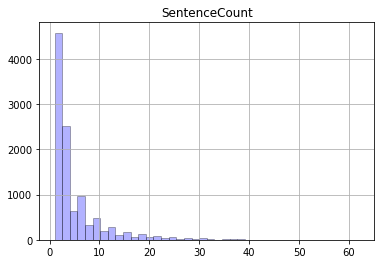

In [13]:
df.hist(column='SentenceCount', color = 'blue', edgecolor = 'black', alpha = 0.3, bins = int(40))

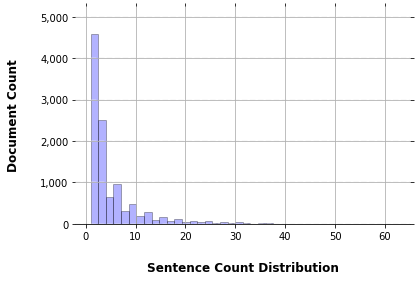

In [15]:
from matplotlib.ticker import StrMethodFormatter

#plot with additional styling.
#ref= https://mode.com/example-gallery/python_histogram/
ax = df.hist(column='SentenceCount', color = 'blue', edgecolor = 'black', alpha = 0.3, bins = int(40))
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Sentence Count Distribution", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Document Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


In [16]:
df.describe()

,SentenceCount
count,10788.000000
mean,4.986281
std,5.710321
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,62.000000


In [17]:
summary = df.describe().transpose()
summary[['count', 'mean', '50%', 'min', 'max']]

,count,mean,50%,min,max
SentenceCount,10788.0,4.986281,3.0,1.0,62.0


In [0]:
#look at words
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer


In [19]:
#for stop words
nltk.download('stopwords')
from nltk.corpus import stopwords

#englishStemmer = SnowballStemmer(language="english", ignore_stopwords=True)
englishStemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import string

lemmatizer = WordNetLemmatizer()

#lemmatizer code from https://simonhessner.de/lemmatize-whole-sentences-with-python-and-nltks-wordnetlemmatizer/
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
def nltk2wn_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:          
    return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
  wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
  res_words = []
  for word, tag in wn_tagged:
    if tag is None:            
      res_words.append(word)
    else:
      res_words.append(lemmatizer.lemmatize(word, tag))
  return res_words

import re
# If you need to use the regex more than once it is suggested to compile it.
notStartsWithAlphaNumber = re.compile(r"[^\w\s]")
onlyDigits = re.compile(r"\d+")


#NOTE: i am not removing stop words since i plan to use this for tf-idf calculation
def normalizeAndLemmatizeSentence(sentence):
  #lowercase
  updatedSentence = sentence.lower()
  #remove punctuations
  
  updatedSentence = updatedSentence.translate(str.maketrans('','',string.punctuation))

  ## Remove punctuation, digits.
  #to-do: i should have been agressive with preprocessing
  #i get these even after removing stop words:
  #  (('&', 'lt'), 8694),
  #  (('lt', ';'), 8694),
  #  (('mln', 'dlr'), 4819),
  #  (('mln', 'vs'), 3916),
  #  (('<s>', '``'), 3617),
  #  ((',', "''"), 3449),

  #\w = a-z, 0-9  
  updatedSentence = notStartsWithAlphaNumber.sub("", updatedSentence)
  updatedSentence = onlyDigits.sub("", updatedSentence)

  #lemmatization
  return lemmatize_sentence(updatedSentence)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
rows_list = []
for documentId in all_documents:
  document_text = get_document_text(documentId)
  # get input row in dictionary format
  all_sentences = extract_sentences(document_text)
  for sentence_index, sentence in enumerate(all_sentences):
    words = word_tokenize(sentence)

    dict = {
        'DocumentId': documentId, 
        'SentenceId': sentence_index,
        'Words': words,
        'NormNLemmatizedWords': normalizeAndLemmatizeSentence(sentence),
        'CharCount': len(sentence),
        'WordCount': len(words)
    }
    rows_list.append(dict)

df_words_chars = pd.DataFrame(rows_list)

In [32]:
df_words_chars

,DocumentId,SentenceId,Words,NormNLemmatizedWords,CharCount,WordCount
0,test/14826,0,"[ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...","[asian, exporter, fear, damage, from, usjapan,...",252,39
1,test/14826,1,"[They, told, Reuter, correspondents, in, Asian...","[they, tell, reuter, correspondent, in, asian,...",184,30
2,test/14826,2,"[But, some, exporters, said, that, while, the,...","[but, some, exporter, say, that, while, the, c...",136,26
3,test/14826,3,"[The, U.S., Has, said, it, will, impose, 300, ...","[the, us, have, say, it, will, impose, mln, dl...",237,45
4,test/14826,4,"[Unofficial, Japanese, estimates, put, the, im...","[unofficial, japanese, estimate, put, the, imp...",199,33
...,...,...,...,...,...,...
53787,training/9992,0,"[KNIGHT-RIDDER, INC, &, lt, ;, KRN, >, SETS, Q...","[knightridder, inc, ltkrn, set, quarterly, qtl...",117,23
53788,training/9993,0,"[TECHNITROL, INC, &, lt, ;, TNL, >, SETS, QUAR...","[technitrol, inc, lttnl, set, quarterly, qtly,...",116,23
53789,training/9994,0,"[NATIONWIDE, CELLULAR, SERVICE, INC, &, lt, ;,...","[nationwide, cellular, service, inc, ltncel, t...",347,61
53790,training/9995,0,"[&, lt, ;, A.H.A, .]",[ltaha],10,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb911242908>,
      dtype=object)

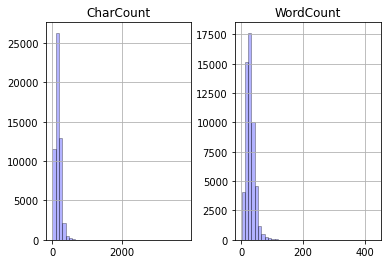

In [34]:
df_words_chars.hist(column=['WordCount','CharCount'], color = 'blue', edgecolor = 'black', alpha = 0.3, bins = int(40))
#to-do look at charts that socorro has -- https://github.com/sedv8808/Simple_Word_Counting/blob/master/Simple_Word_Counting.ipynb

,SentenceId,CharCount,WordCount
count,53792.000000,53792.000000,53792.000000
mean,5.262586,158.816088,28.786288
std,6.345458,87.285067,14.752599
min,0.000000,1.000000,1.000000
25%,1.000000,103.000000,19.000000
50%,3.000000,149.000000,27.000000
75%,7.000000,203.000000,36.000000
max,61.000000,3781.000000,429.000000


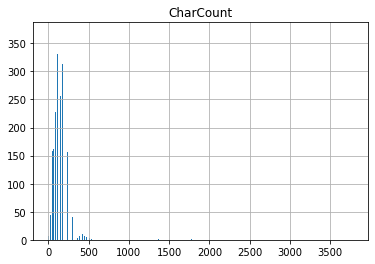

In [35]:
#plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth))
df_words_chars.hist(column=['CharCount'], bins=10000)
df_words_chars.describe()


In [36]:
df_words_chars.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
SentenceId,53792.0,5.262586,6.345458,0.0,1.0,3.0,7.0,61.0
CharCount,53792.0,158.816088,87.285067,1.0,103.0,149.0,203.0,3781.0
WordCount,53792.0,28.786288,14.752599,1.0,19.0,27.0,36.0,429.0


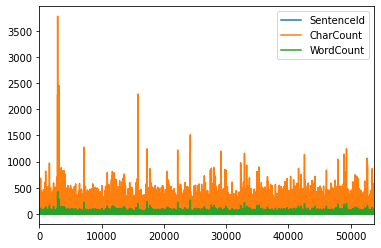

In [37]:
#feedback from socorro: to-do: Why sentenceId is being plotted?
#If you need sentenceCount, that's absent so you need to do a group-by
#the default options for plot is NOT a good choice here.
df_words_chars.plot()

More visualization is @ https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-hist

In [0]:
from nltk.util import ngrams
stop_words = set(stopwords.words('english')) 

#get with start and stop symbols
def getBigrams(words):
  return list(ngrams(words, 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'))

def getBigramsWithStemming(words, skipStopWords = False):
  stemmed_words = [englishStemmer.stem(word) for word in words]
  if(skipStopWords):
    filtered_stemmed_words = [w for w in stemmed_words if not w in stop_words]
  else:
    filtered_stemmed_words = stemmed_words
  #print(stopwords.words('english'))
  #print(filtered_stemmed_words)
  return list(ngrams(filtered_stemmed_words , 2, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'))


#print(getBigramsWithStemming(['when','am','i','going','to','the','shop','?']))
#print(getBigramsWithStemming(['when','am','i','going','to','the','shop','?'], skipStopWords=True))

In [0]:
df_words_chars['BiGrams']= df_words_chars['Words'].apply(lambda row: getBigrams(row))
df_words_chars['BiGramsWithStemming']= df_words_chars['Words'].apply(lambda row: getBigramsWithStemming(row))

#also use normalized words....
df_words_chars['BiGramsWithStemmingNoStopWords']= df_words_chars['NormNLemmatizedWords'].apply(lambda row: getBigramsWithStemming(row, skipStopWords=True))


In [49]:
df_words_chars

,DocumentId,SentenceId,Words,NormNLemmatizedWords,CharCount,WordCount,BiGrams,BiGramsWithStemming,BiGramsWithStemmingNoStopWords
0,test/14826,0,"[ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...","[asian, exporter, fear, damage, from, usjapan,...",252,39,"[(<s>, ASIAN), (ASIAN, EXPORTERS), (EXPORTERS,...","[(<s>, asian), (asian, export), (export, fear)...","[(<s>, asian), (asian, export), (export, fear)..."
1,test/14826,1,"[They, told, Reuter, correspondents, in, Asian...","[they, tell, reuter, correspondent, in, asian,...",184,30,"[(<s>, They), (They, told), (told, Reuter), (R...","[(<s>, they), (they, told), (told, reuter), (r...","[(<s>, tell), (tell, reuter), (reuter, corresp..."
2,test/14826,2,"[But, some, exporters, said, that, while, the,...","[but, some, exporter, say, that, while, the, c...",136,26,"[(<s>, But), (But, some), (some, exporters), (...","[(<s>, but), (but, some), (some, export), (exp...","[(<s>, export), (export, say), (say, conflict)..."
3,test/14826,3,"[The, U.S., Has, said, it, will, impose, 300, ...","[the, us, have, say, it, will, impose, mln, dl...",237,45,"[(<s>, The), (The, U.S.), (U.S., Has), (Has, s...","[(<s>, the), (the, u.s.), (u.s., ha), (ha, sai...","[(<s>, us), (us, say), (say, impos), (impos, m..."
4,test/14826,4,"[Unofficial, Japanese, estimates, put, the, im...","[unofficial, japanese, estimate, put, the, imp...",199,33,"[(<s>, Unofficial), (Unofficial, Japanese), (J...","[(<s>, unoffici), (unoffici, japanes), (japane...","[(<s>, unoffici), (unoffici, japanes), (japane..."
...,...,...,...,...,...,...,...,...,...
53787,training/9992,0,"[KNIGHT-RIDDER, INC, &, lt, ;, KRN, >, SETS, Q...","[knightridder, inc, ltkrn, set, quarterly, qtl...",117,23,"[(<s>, KNIGHT-RIDDER), (KNIGHT-RIDDER, INC), (...","[(<s>, knight-ridd), (knight-ridd, inc), (inc,...","[(<s>, knightridd), (knightridd, inc), (inc, l..."
53788,training/9993,0,"[TECHNITROL, INC, &, lt, ;, TNL, >, SETS, QUAR...","[technitrol, inc, lttnl, set, quarterly, qtly,...",116,23,"[(<s>, TECHNITROL), (TECHNITROL, INC), (INC, &...","[(<s>, technitrol), (technitrol, inc), (inc, &...","[(<s>, technitrol), (technitrol, inc), (inc, l..."
53789,training/9994,0,"[NATIONWIDE, CELLULAR, SERVICE, INC, &, lt, ;,...","[nationwide, cellular, service, inc, ltncel, t...",347,61,"[(<s>, NATIONWIDE), (NATIONWIDE, CELLULAR), (C...","[(<s>, nationwid), (nationwid, cellular), (cel...","[(<s>, nationwid), (nationwid, cellular), (cel..."
53790,training/9995,0,"[&, lt, ;, A.H.A, .]",[ltaha],10,5,"[(<s>, &), (&, lt), (lt, ;), (;, A.H.A), (A.H....","[(<s>, &), (&, lt), (lt, ;), (;, a.h.a), (a.h....","[(<s>, ltaha), (ltaha, </s>)]"


In [50]:
from nltk import FreqDist
allBiGrams = []
allBiGramsWithStemmingNoStopWords = []
df_words_chars['BiGrams'].apply(lambda bigrams: allBiGrams.extend(bigrams))
df_words_chars['BiGramsWithStemmingNoStopWords'].apply(lambda bigrams: allBiGramsWithStemmingNoStopWords.extend(bigrams))


0        None
1        None
2        None
3        None
4        None
         ... 
53787    None
53788    None
53789    None
53790    None
53791    None
Name: BiGramsWithStemmingNoStopWords, Length: 53792, dtype: object

In [51]:
len(allBiGrams)


1602264

In [0]:
biGramsFreqDist = nltk.FreqDist(allBiGrams)
biGramsWithStemmingNoStopWordsFreqDist = nltk.FreqDist(allBiGramsWithStemmingNoStopWords)

In [53]:
biGramsFreqDist.most_common(10)

[(('.', '</s>'), 49395),
 (('<s>', 'The'), 8839),
 (('&', 'lt'), 8694),
 (('lt', ';'), 8694),
 (('said', '.'), 7888),
 (('of', 'the'), 6803),
 (('in', 'the'), 6486),
 ((',', 'the'), 4391),
 (('mln', 'dlrs'), 4191),
 (('said', 'it'), 4003)]

In [54]:
biGramsWithStemmingNoStopWordsFreqDist.most_common(10)

[(('say', '</s>'), 8059),
 (('mln', 'dlr'), 4828),
 (('ct', 'vs'), 3318),
 (('v', 'mln'), 3086),
 (('mln', 'v'), 2931),
 (('ct', 'net'), 2245),
 (('<s>', 'say'), 2222),
 (('billion', 'dlr'), 1901),
 (('vs', 'ct'), 1845),
 (('rev', 'mln'), 1619)]

In [0]:
def showFrequencies(dataframeColumn):
  allBiGrams = []
  dataframeColumn.apply(lambda bigrams: allBiGrams.extend(bigrams))
  biGramsFreqDist = nltk.FreqDist(allBiGrams)
  return biGramsFreqDist.most_common(10)


In [56]:
showFrequencies(df_words_chars['BiGrams'])

[(('.', '</s>'), 49395),
 (('<s>', 'The'), 8839),
 (('&', 'lt'), 8694),
 (('lt', ';'), 8694),
 (('said', '.'), 7888),
 (('of', 'the'), 6803),
 (('in', 'the'), 6486),
 ((',', 'the'), 4391),
 (('mln', 'dlrs'), 4191),
 (('said', 'it'), 4003)]

In [57]:
showFrequencies(df_words_chars['BiGramsWithStemming'])

[(('.', '</s>'), 49395),
 (('<s>', 'the'), 8865),
 (('&', 'lt'), 8694),
 (('lt', ';'), 8694),
 (('said', '.'), 7890),
 (('of', 'the'), 6809),
 (('in', 'the'), 6493),
 (('mln', 'dlr'), 4816),
 (('said', 'it'), 4750),
 ((',', 'the'), 4411)]

In [58]:
showFrequencies(df_words_chars['BiGramsWithStemmingNoStopWords'])

[(('say', '</s>'), 8059),
 (('mln', 'dlr'), 4828),
 (('ct', 'vs'), 3318),
 (('v', 'mln'), 3086),
 (('mln', 'v'), 2931),
 (('ct', 'net'), 2245),
 (('<s>', 'say'), 2222),
 (('billion', 'dlr'), 1901),
 (('vs', 'ct'), 1845),
 (('rev', 'mln'), 1619)]

- Write TF-IDF from first principles. Now, create and store meta-data for the current corpus
- Have a function that takes a document and plots the terms of the doc as measured by the TFIDF score. 


In [0]:
#iterate over the documents to collect the term frequencies.
#def showFrequencies(dataframeColumn):
df_words_chars_by_doc = df_words_chars.groupby("DocumentId")
docTermFequencyDict = {}
for DocumentId, dataframe in df_words_chars_by_doc:
  allWords = []
  dataframe["NormNLemmatizedWords"].apply(lambda words: allWords.extend(words))
  termDocFreqDist = nltk.FreqDist(allWords)
  #sum all the terms in the doc
  totalCount = sum(termDocFreqDist.values())
  docTermFequencyDict[DocumentId] = {'TotalCount' : totalCount, 'TermDocFreqDist' : termDocFreqDist}



In [60]:
#print top 5 items
[print(v) for i, v in enumerate(docTermFequencyDict.items()) if i < 5]


('test/14826', {'TotalCount': 703, 'TermDocFreqDist': FreqDist({'the': 37, 'of': 30, 'to': 26, 'us': 18, 'be': 17, 'trade': 16, 'and': 16, 'say': 16, 'in': 16, 'a': 15, ...})})
('test/14828', {'TotalCount': 101, 'TermDocFreqDist': FreqDist({'and': 6, 'of': 5, 'the': 5, 'china': 4, 'say': 4, 'pct': 4, 'to': 3, 'daily': 2, 'vermin': 2, 'grain': 2, ...})})
('test/14829', {'TotalCount': 166, 'TermDocFreqDist': FreqDist({'the': 13, 'energy': 8, 'of': 8, 'in': 6, 'to': 5, 'and': 5, 'miti': 4, 'a': 4, 'say': 4, 'demand': 3, ...})})
('test/14832', {'TotalCount': 132, 'TermDocFreqDist': FreqDist({'pct': 10, 'billion': 6, 'in': 5, 'to': 5, 'the': 5, 'first': 4, 'quarter': 4, 'from': 4, 'baht': 3, 'say': 3, ...})})
('test/14833', {'TotalCount': 151, 'TermDocFreqDist': FreqDist({'to': 8, 'of': 5, 'indonesia': 4, 'cpo': 4, 'palm': 4, 'oil': 4, 'a': 4, 'in': 4, 'be': 4, 'price': 3, ...})})


[None, None, None, None, None]

In [61]:
totalNumberOfDocuments = len(df_words_chars_by_doc)
print(f'Verify total number of doc = {totalNumberOfDocuments}')

Verify total number of doc = 10788


In [0]:
#make a dictionary of all terms and the number of documents in which the term is present (for IDF)
IDF_t = {}

#wish i knew how to write multi-threaded code in python with thread safety
#to-do -- see if you can make it more compact?
for freqDist in docTermFequencyDict.values():
  for term, count in freqDist['TermDocFreqDist'].items():
    if(term in IDF_t):
      IDF_t[term] += 1
    else:
      IDF_t[term] = 1
  


In [63]:
IDF_t['of']

7621

In [0]:
import math
def TF_IDF(term, document):
  if(document not in docTermFequencyDict):
    return 0
  docDetails = docTermFequencyDict[document]
  if(term not in docDetails['TermDocFreqDist']):
    return 0
  if(term not in IDF_t):
    return 0
  tf_t = docDetails['TermDocFreqDist'][term]/ docDetails['TotalCount']
  idf_t = math.log(totalNumberOfDocuments/ IDF_t[term])
  return tf_t * idf_t



In [65]:
print(TF_IDF('hhhhh899h9', 'test/14829'))
print(TF_IDF('the', 'test/14829'))
print(TF_IDF('energy', 'test/14829'))
print(TF_IDF('energy', 'test/1482dd9'))

0
0.034501407005738845
0.17075597573253679
0
